# Performance benchmarks for LIF layers in Rockpool
This notebook runs and collects results for all benchmarks provided in `rockpool.utilities.benchmarks`.

In [1]:
# - Display a description for the benchmarking system
import rockpool
import os
import datetime
import sys

print(f'Benchmarks run on rockpool version {rockpool.__version__}, on date {datetime.datetime.today()}.')
print(f'Python version {sys.version}')
u = os.uname()
print(f'System descriptor: {u[0]} {u[2]} {u[4]}')

try:
    import jax
    print(f'Jax devices: {jax.devices()}')
except:
    print('Jax not found')

try:
    import torch
    is_cuda_available = torch.cuda.is_available()
    print(f'Torch CUDA available: {is_cuda_available}')
    if is_cuda_available:
        print(f'    Number of devices: {torch.cuda.device_count()}')
        print(f'    CUDA devices: {[torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())]}')
except:
    pass

/home/dylan/mina_hdd/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Benchmarks run on rockpool version 2.4.dev, on date 2022-11-21 15:42:03.329412.
Python version 3.8.13 (default, Oct 21 2022, 23:50:54) 
[GCC 11.2.0]
System descriptor: Linux 5.15.0-53-generic x86_64
Jax devices: [StreamExecutorGpuDevice(id=0, process_index=0, slice_index=0)]
Torch CUDA available: True
    Number of devices: 1
    CUDA devices: ['NVIDIA GeForce RTX 3090 Ti']


In [2]:
# - Run all benchmarks and collect results
from rockpool.utilities.benchmarking import benchmark_neurons, plot_benchmark_results, all_lif_benchmarks
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (17, 5)

bench_results = []

for benchmark in all_lif_benchmarks:
    try:
        p_fn, c_fn, e_fn, bench_name = benchmark()
        print(f'Running benchmark "{bench_name}"...')

        bench_results.append(benchmark_neurons(p_fn, c_fn, e_fn, bench_name))

    except Exception as e:
        warnings.warn(f'Benchmark {bench_name} failed with error {str(e)}.')

Running benchmark "LIFExodus on a CUDA device"...


100%|██████████| 12/12 [00:49<00:00,  4.09s/it]


Running benchmark "LIF with no acceleration (numpy backend)"...


100%|██████████| 12/12 [01:38<00:00,  8.25s/it]


Running benchmark "LIFTorch using CUDA graph replay acceleration"...


100%|██████████| 12/12 [01:24<00:00,  7.05s/it]


Running benchmark "LIFTorch on a CUDA device"...


100%|██████████| 12/12 [01:10<00:00,  5.86s/it]


Running benchmark "LIFTorch on CPU"...


100%|██████████| 12/12 [01:04<00:00,  5.40s/it]


Running benchmark "LIFJax, no JIT"...


  8%|▊         | 1/12 [00:07<01:22,  7.50s/it]2022-11-21 15:48:30.069633: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:219] failed to create cublas handle: cublas error
2022-11-21 15:48:30.069778: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:221] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-11-21 15:48:30.105303: E external/org_tensorflow/tensorflow/compiler/xla/status_macros.cc:57] INTERNAL: RET_CHECK failure (external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gemm_algorithm_picker.cc:327) stream->parent()->GetBlasGemmAlgorithms(stream, &algorithms) 
*** Begin stack trace ***
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	PyCFunction_Call
	_PyObject_MakeTpCall
	
	_PyEval_EvalFrameDef

Running benchmark "LIFJax, with CPU JIT compilation"...


100%|██████████| 12/12 [06:58<00:00, 34.84s/it] 


Running benchmark "LIFJax, with GPU JIT compilation"...


  8%|▊         | 1/12 [00:04<00:49,  4.54s/it]2022-11-21 15:55:45.544263: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:219] failed to create cublas handle: cublas error
2022-11-21 15:55:45.544297: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:221] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-11-21 15:55:45.545708: E external/org_tensorflow/tensorflow/compiler/xla/status_macros.cc:57] INTERNAL: RET_CHECK failure (external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gemm_algorithm_picker.cc:327) stream->parent()->GetBlasGemmAlgorithms(stream, &algorithms) 
*** Begin stack trace ***
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	PyCFunction_Call
	_PyObject_MakeTpCall
	
	_PyEval_EvalFrameDef

Running benchmark "LIFJax, with TPU JIT compilation"...


  0%|          | 0/12 [00:00<?, ?it/s]/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 1 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 2 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(
 17%|█▋        | 2/12 [00:00<00:00, 12.40it/s]/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 5 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 10 failed with error Backend '

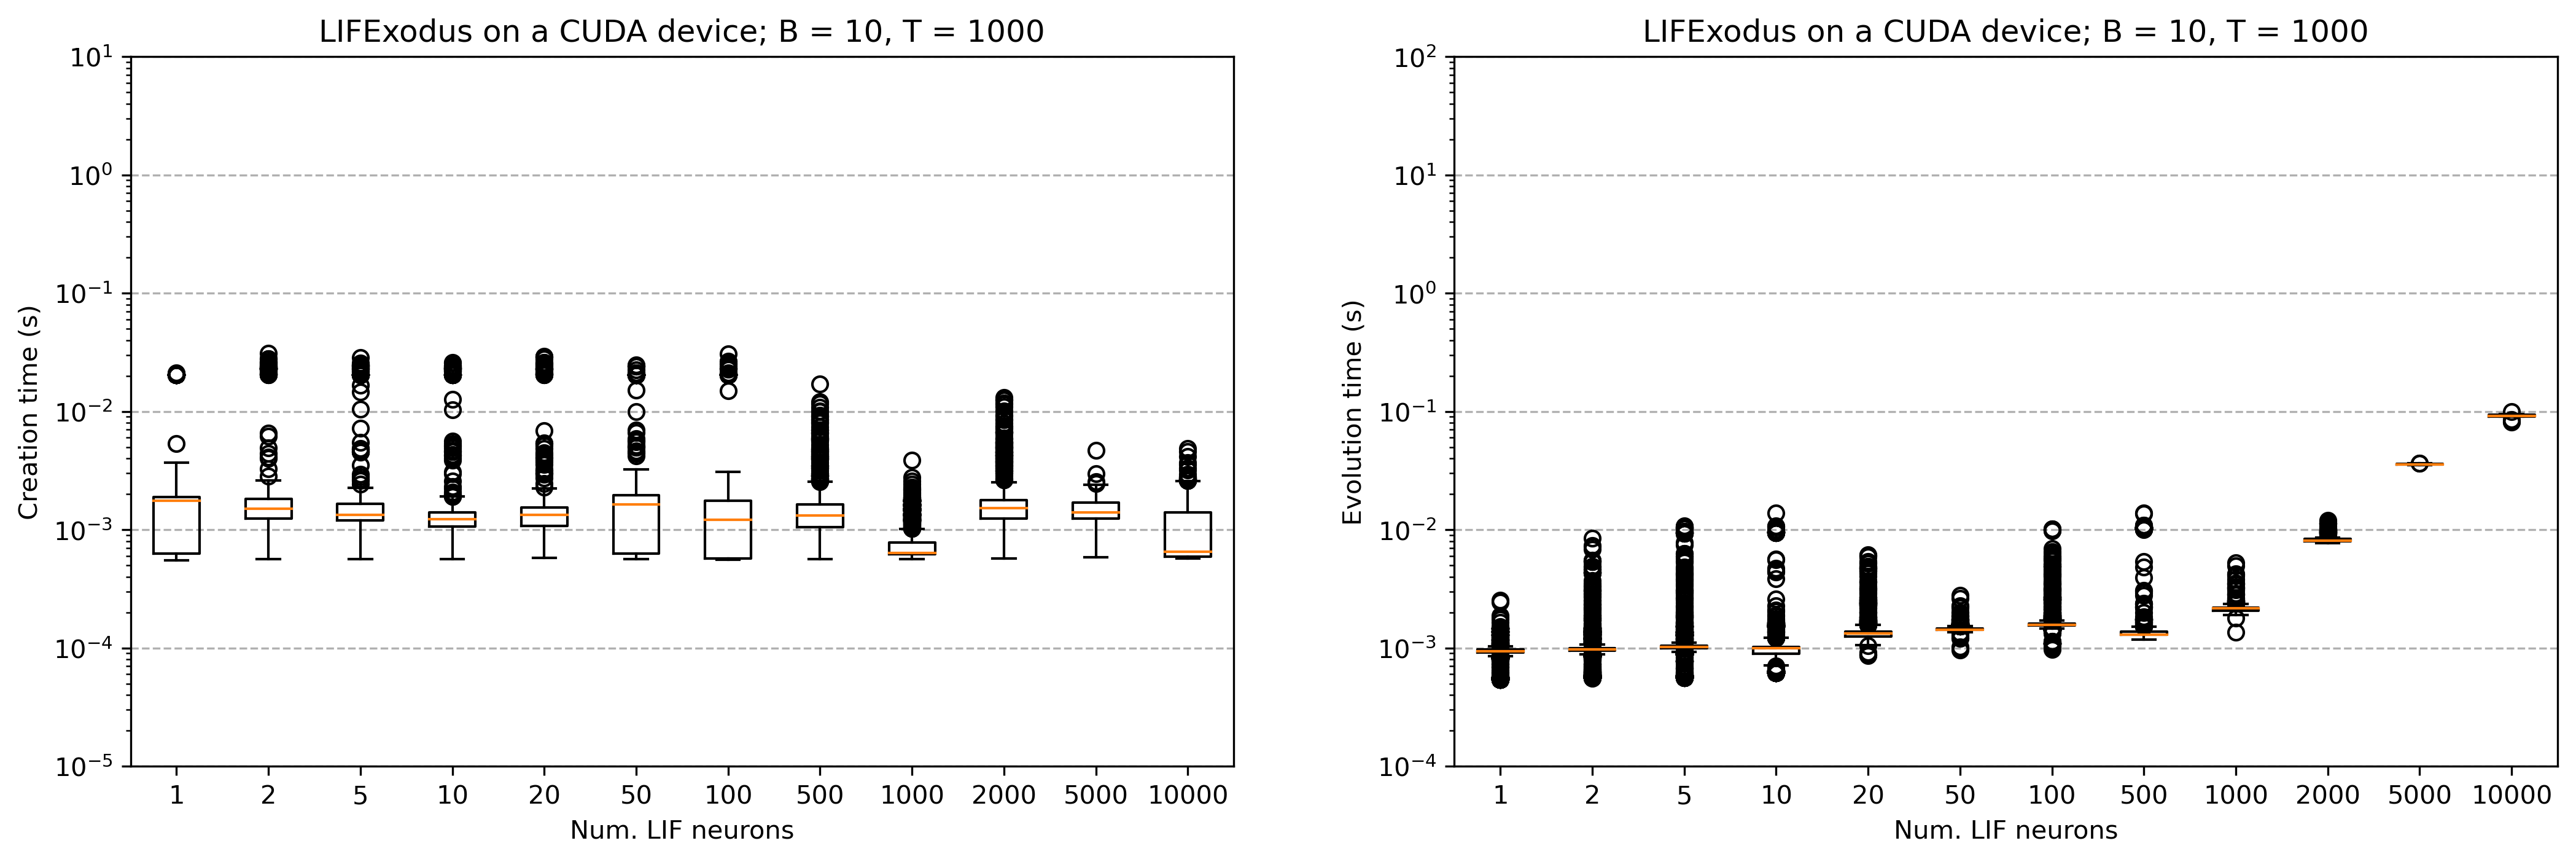

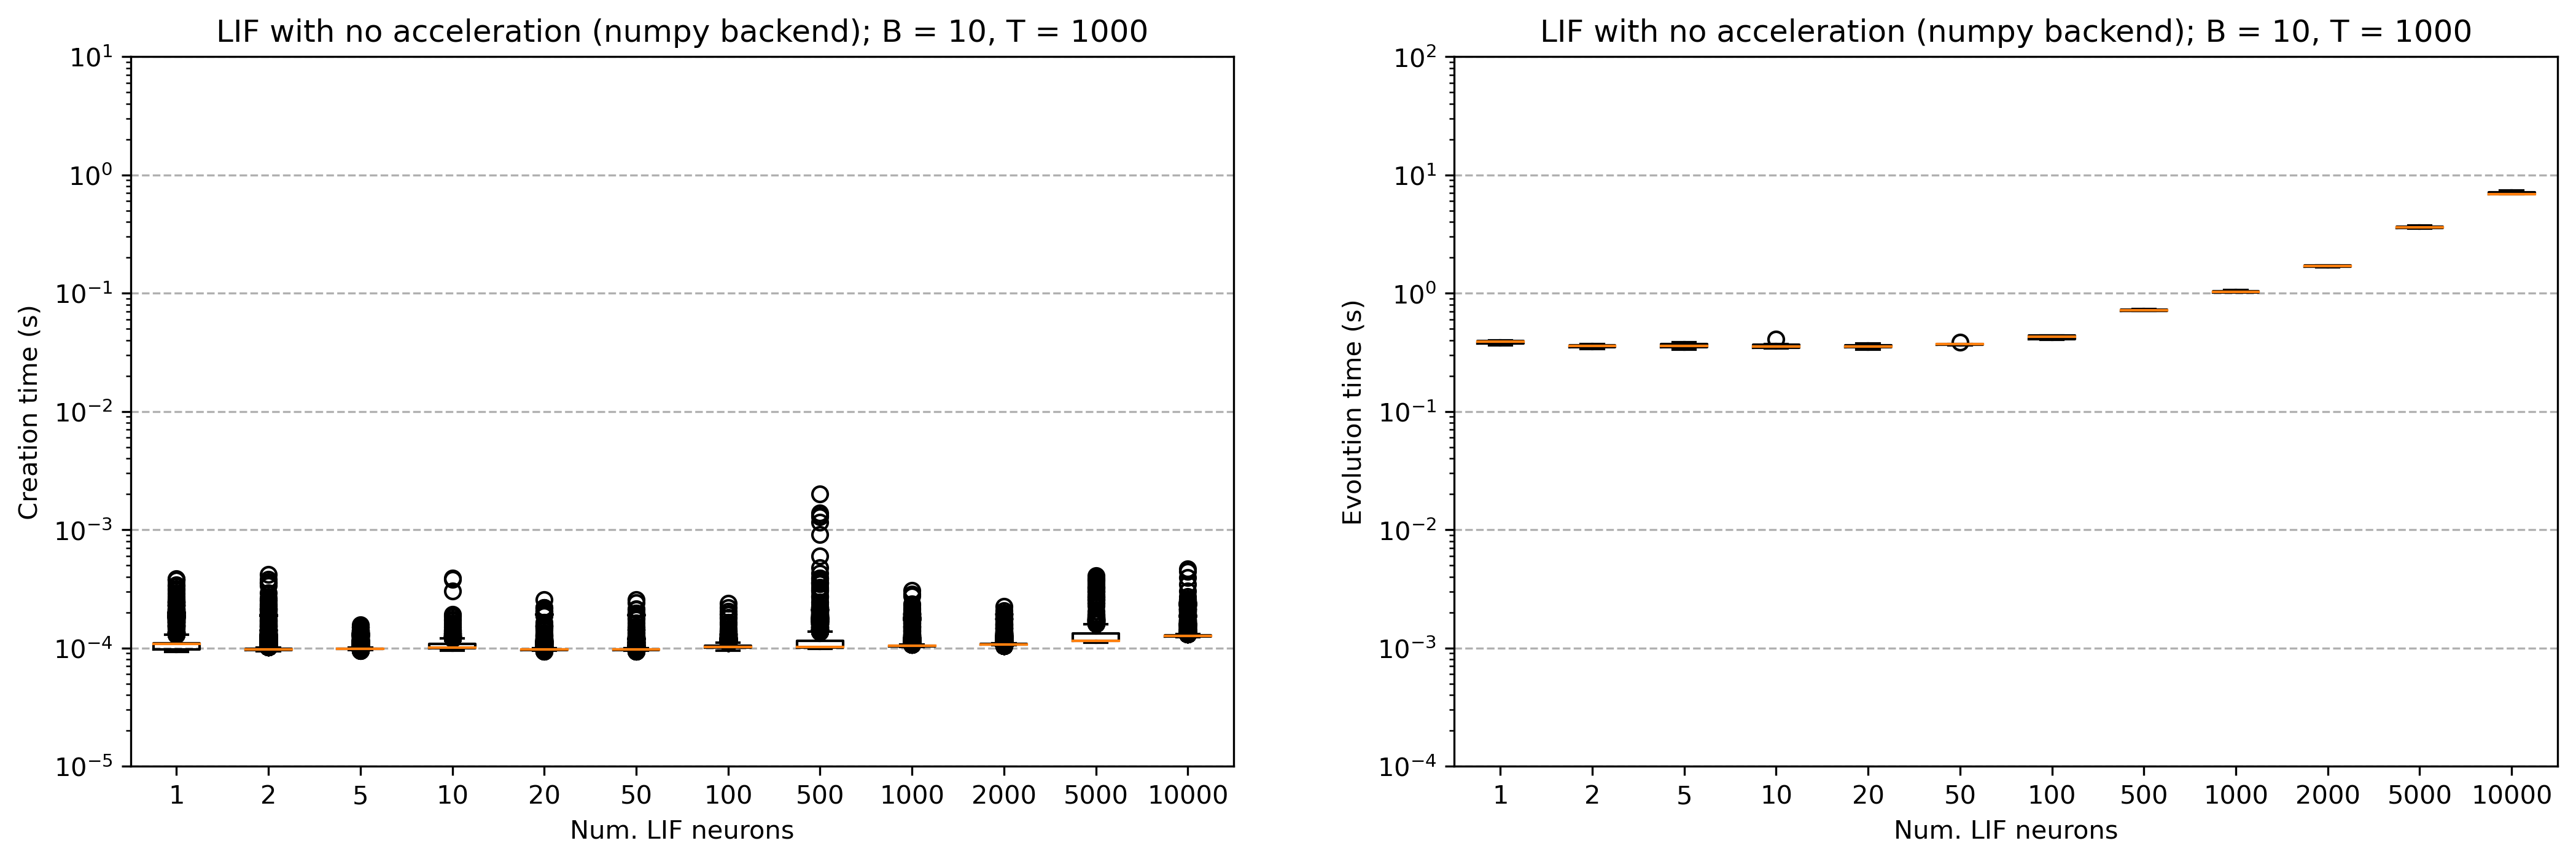

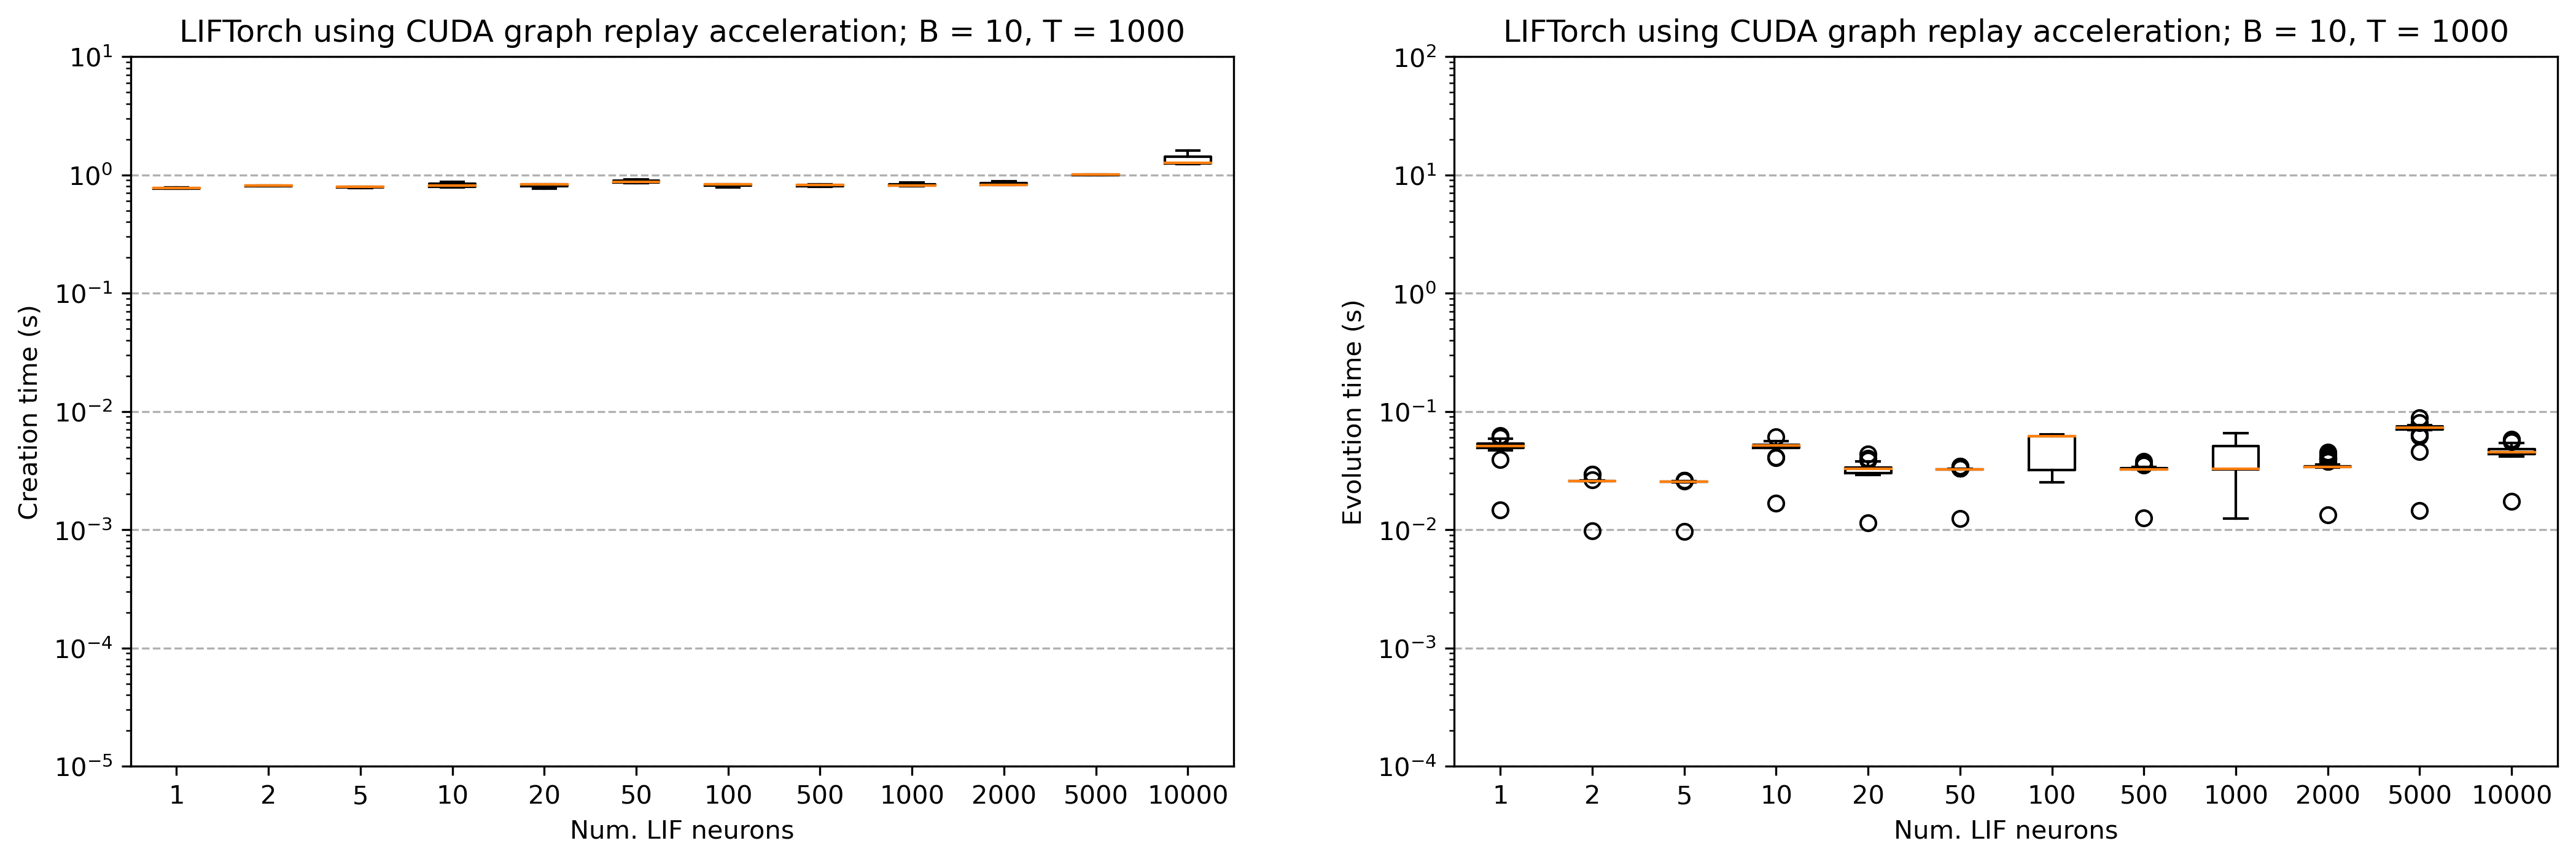

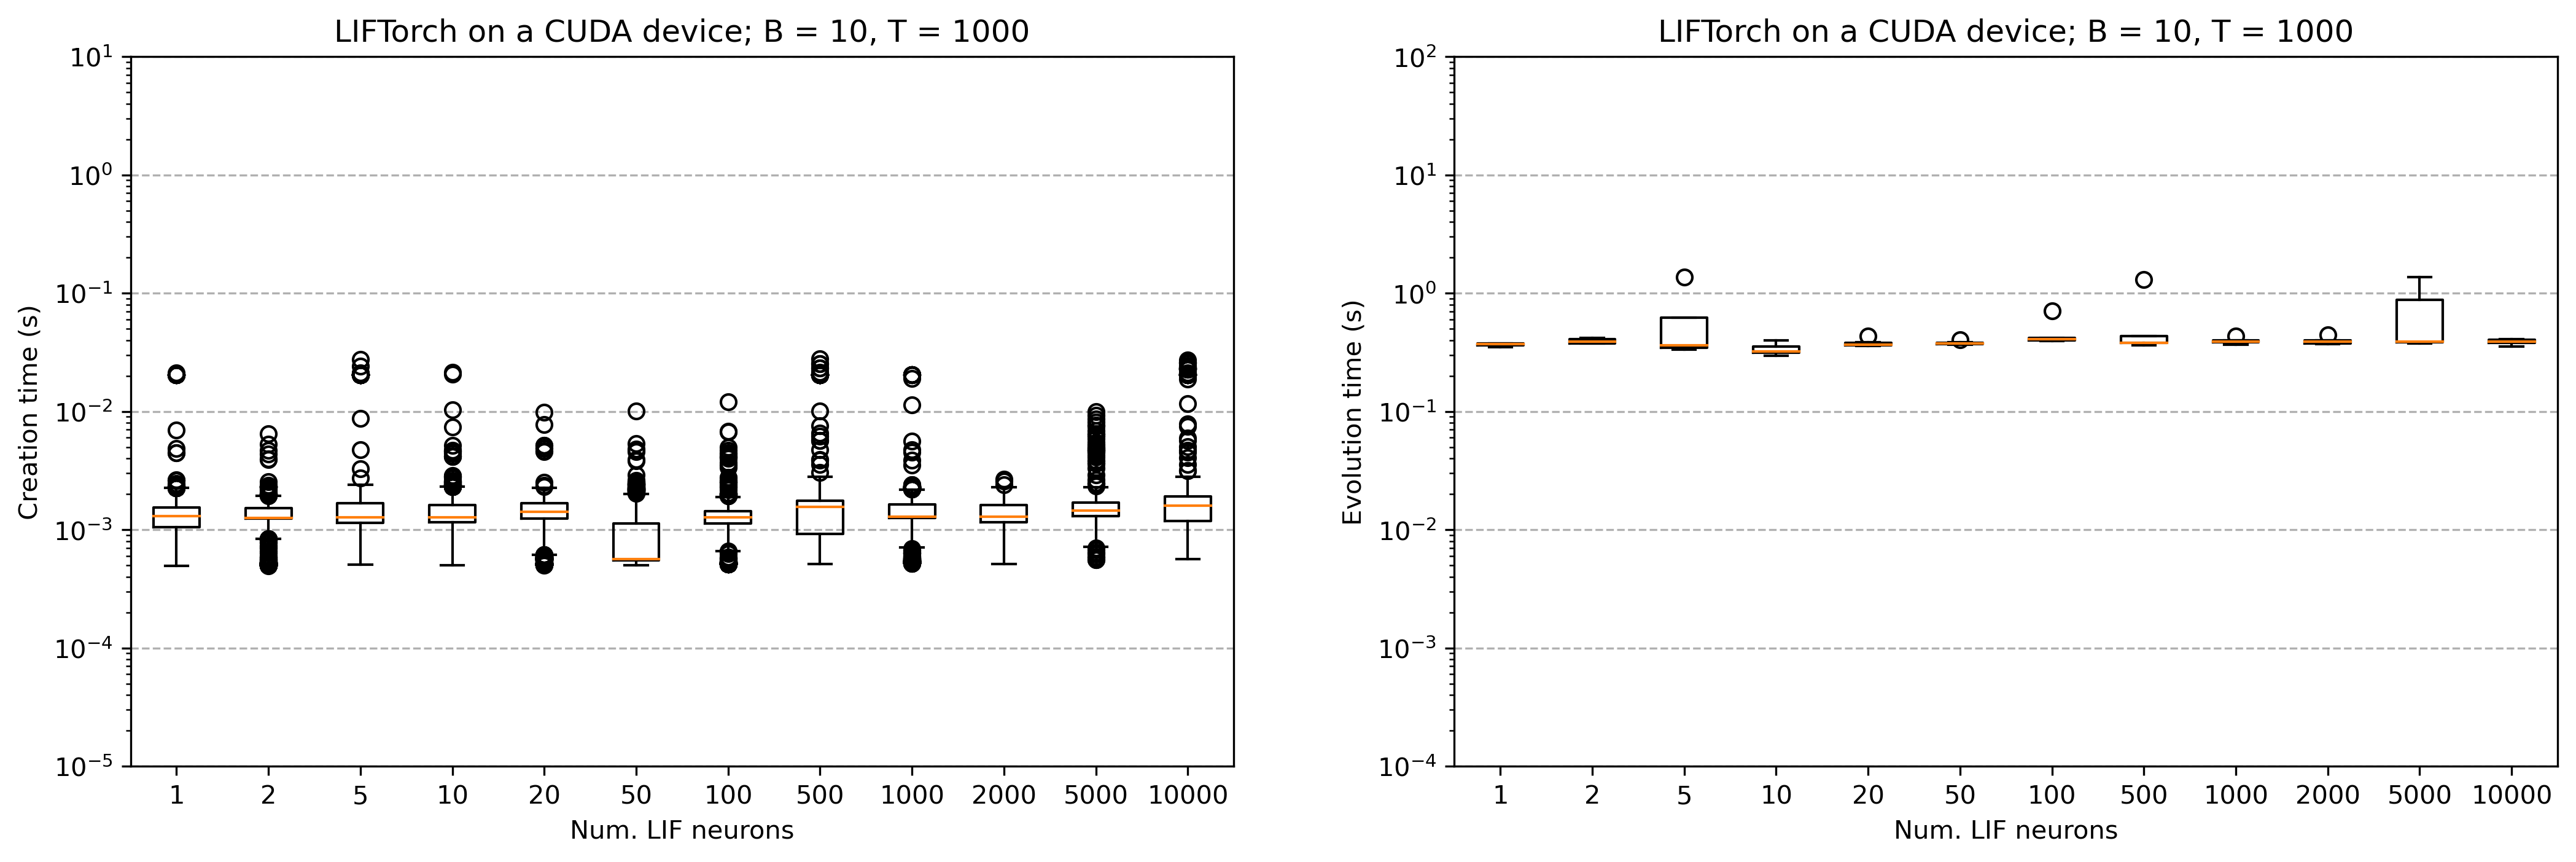

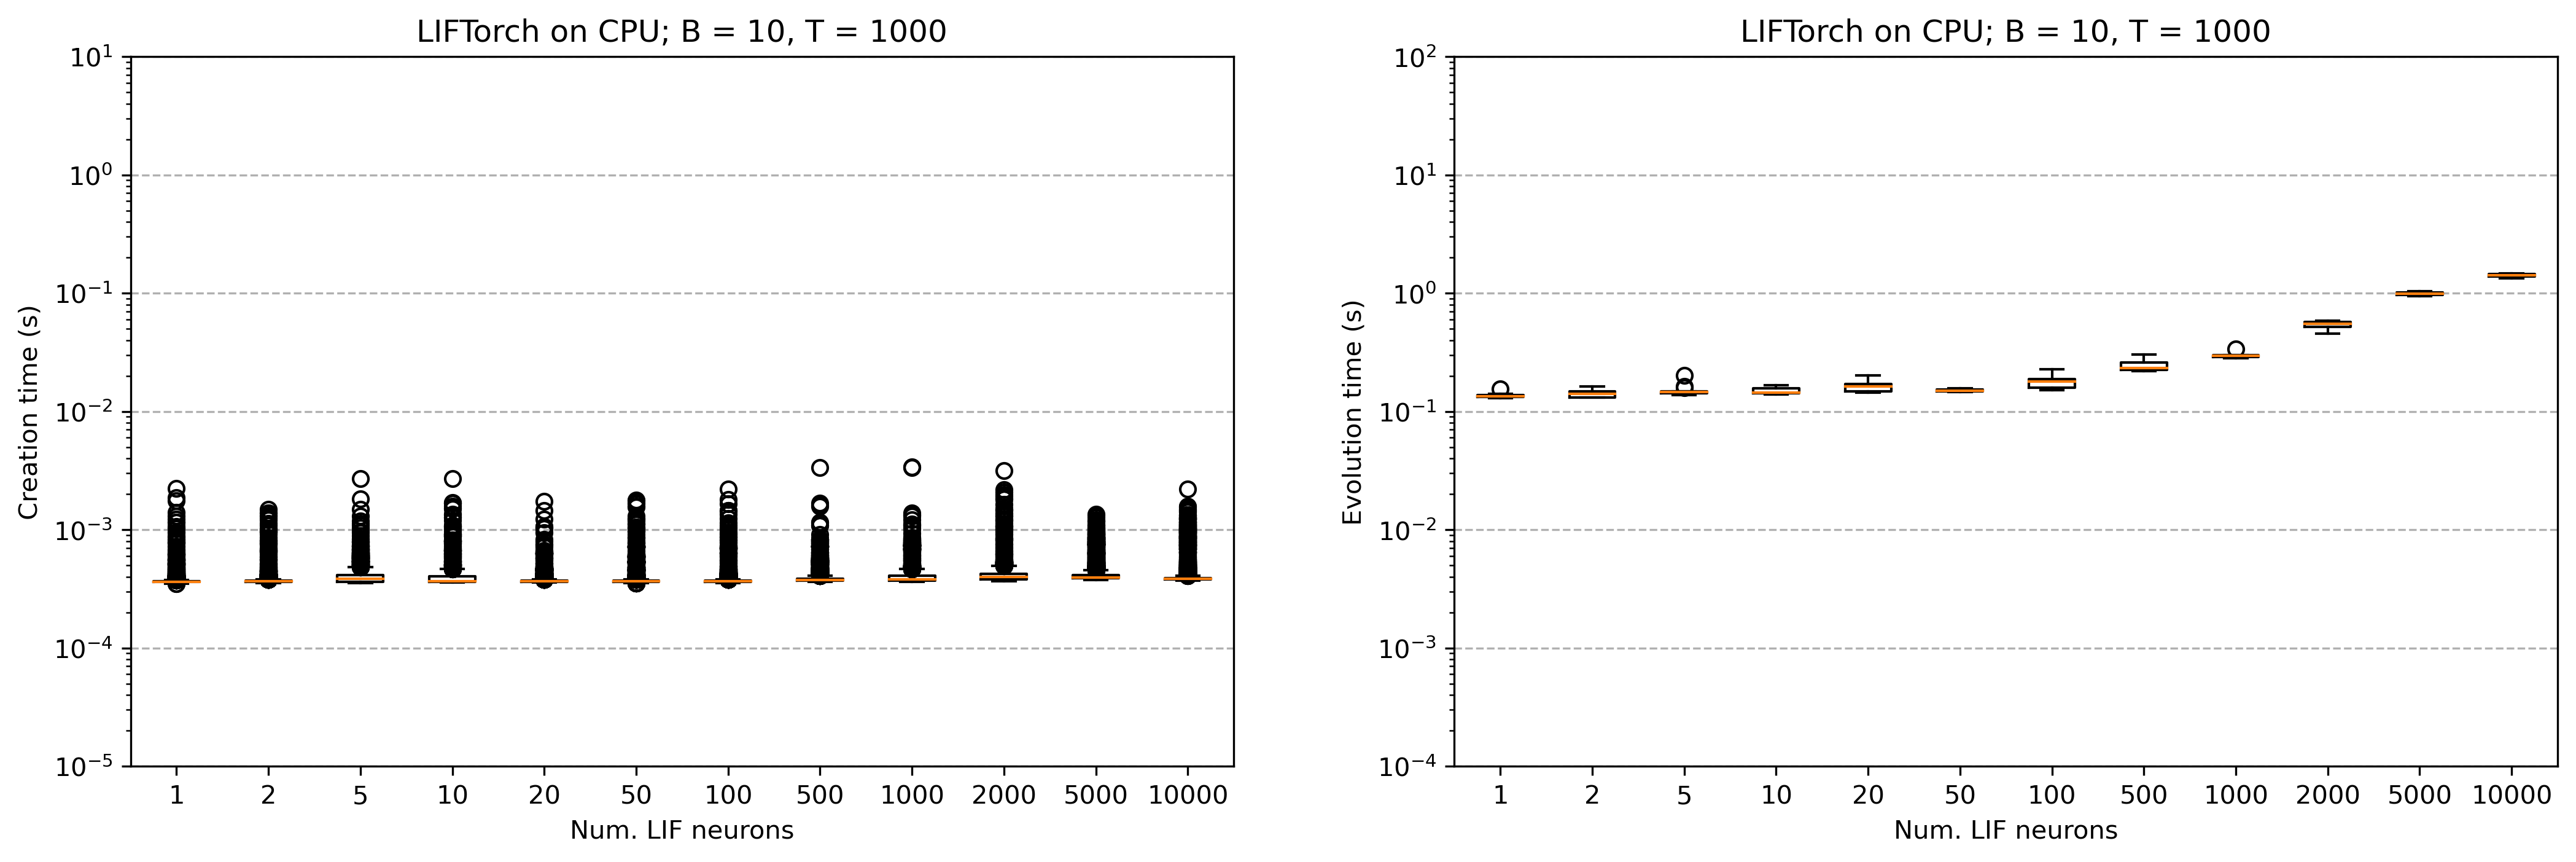

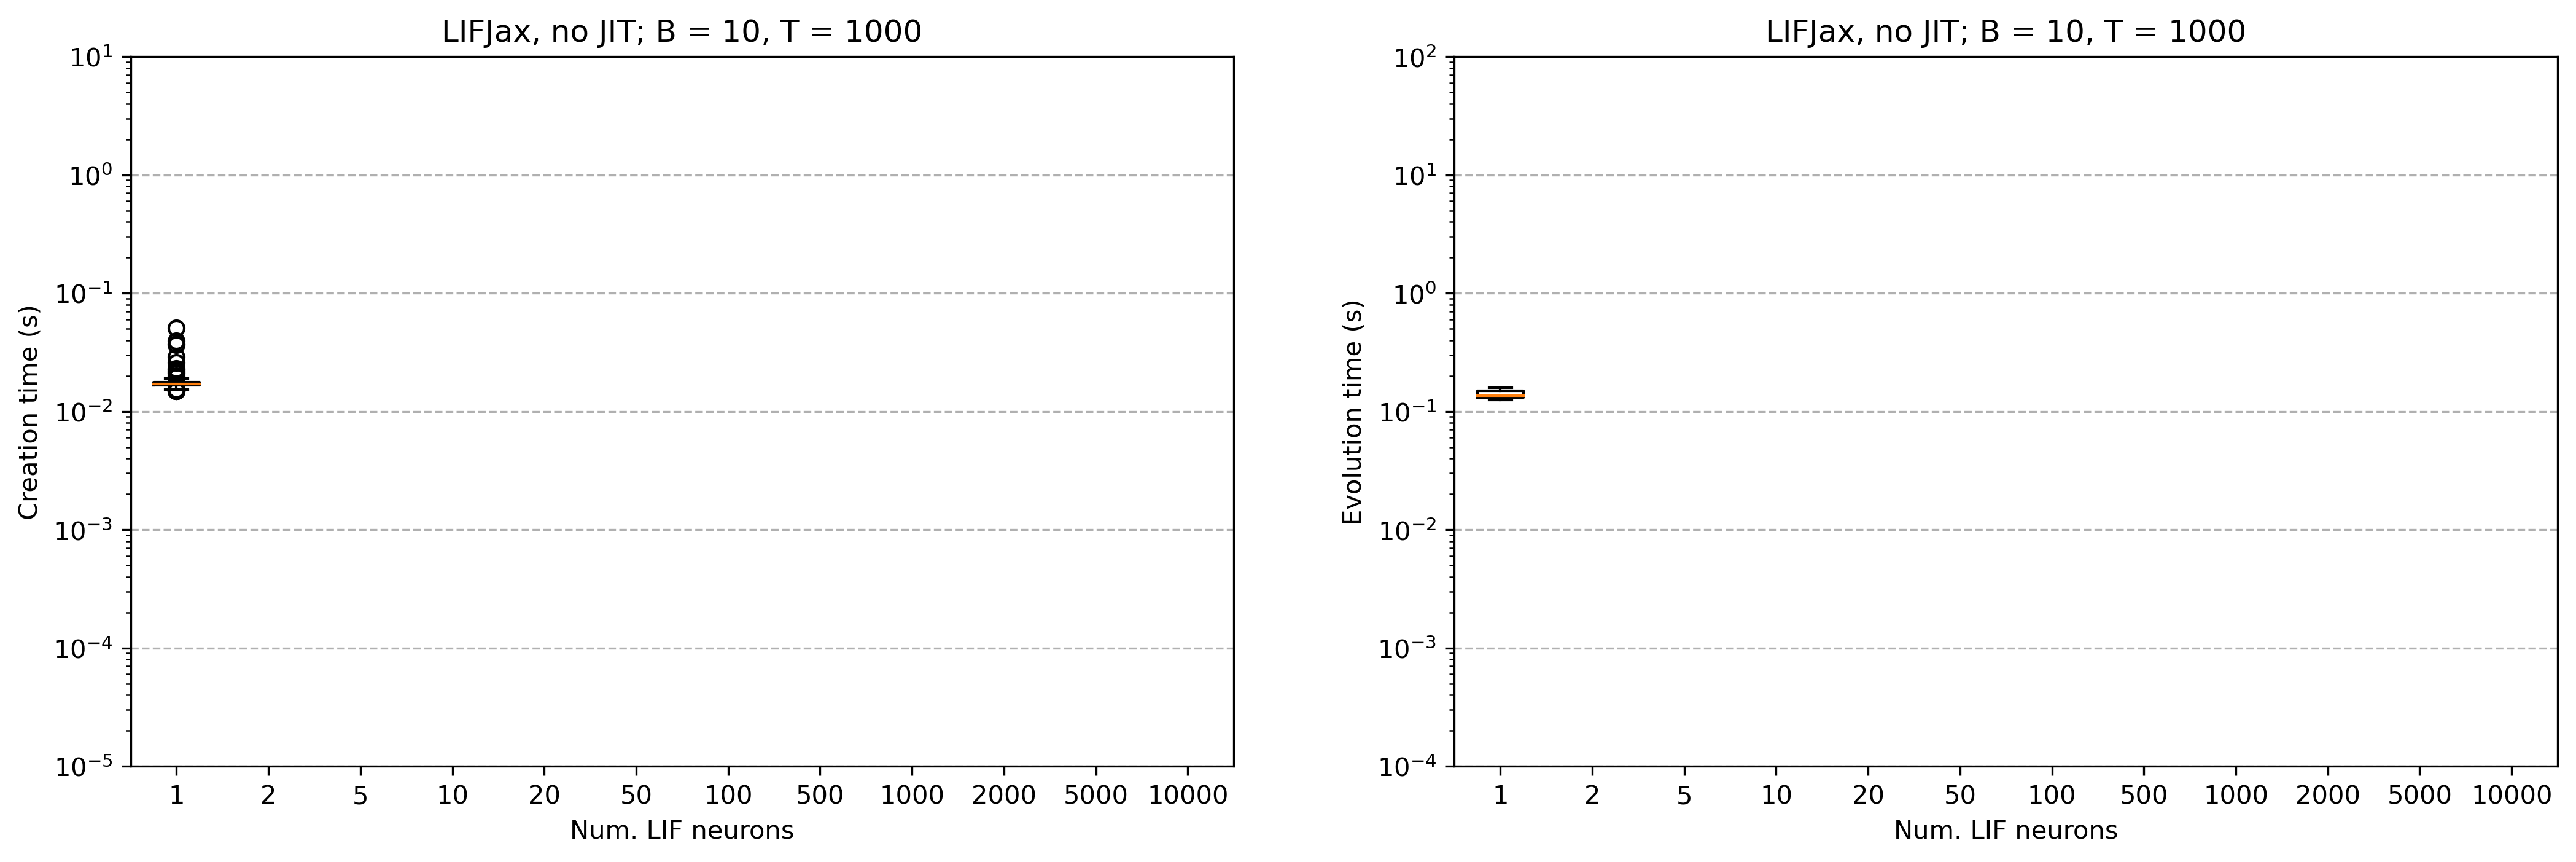

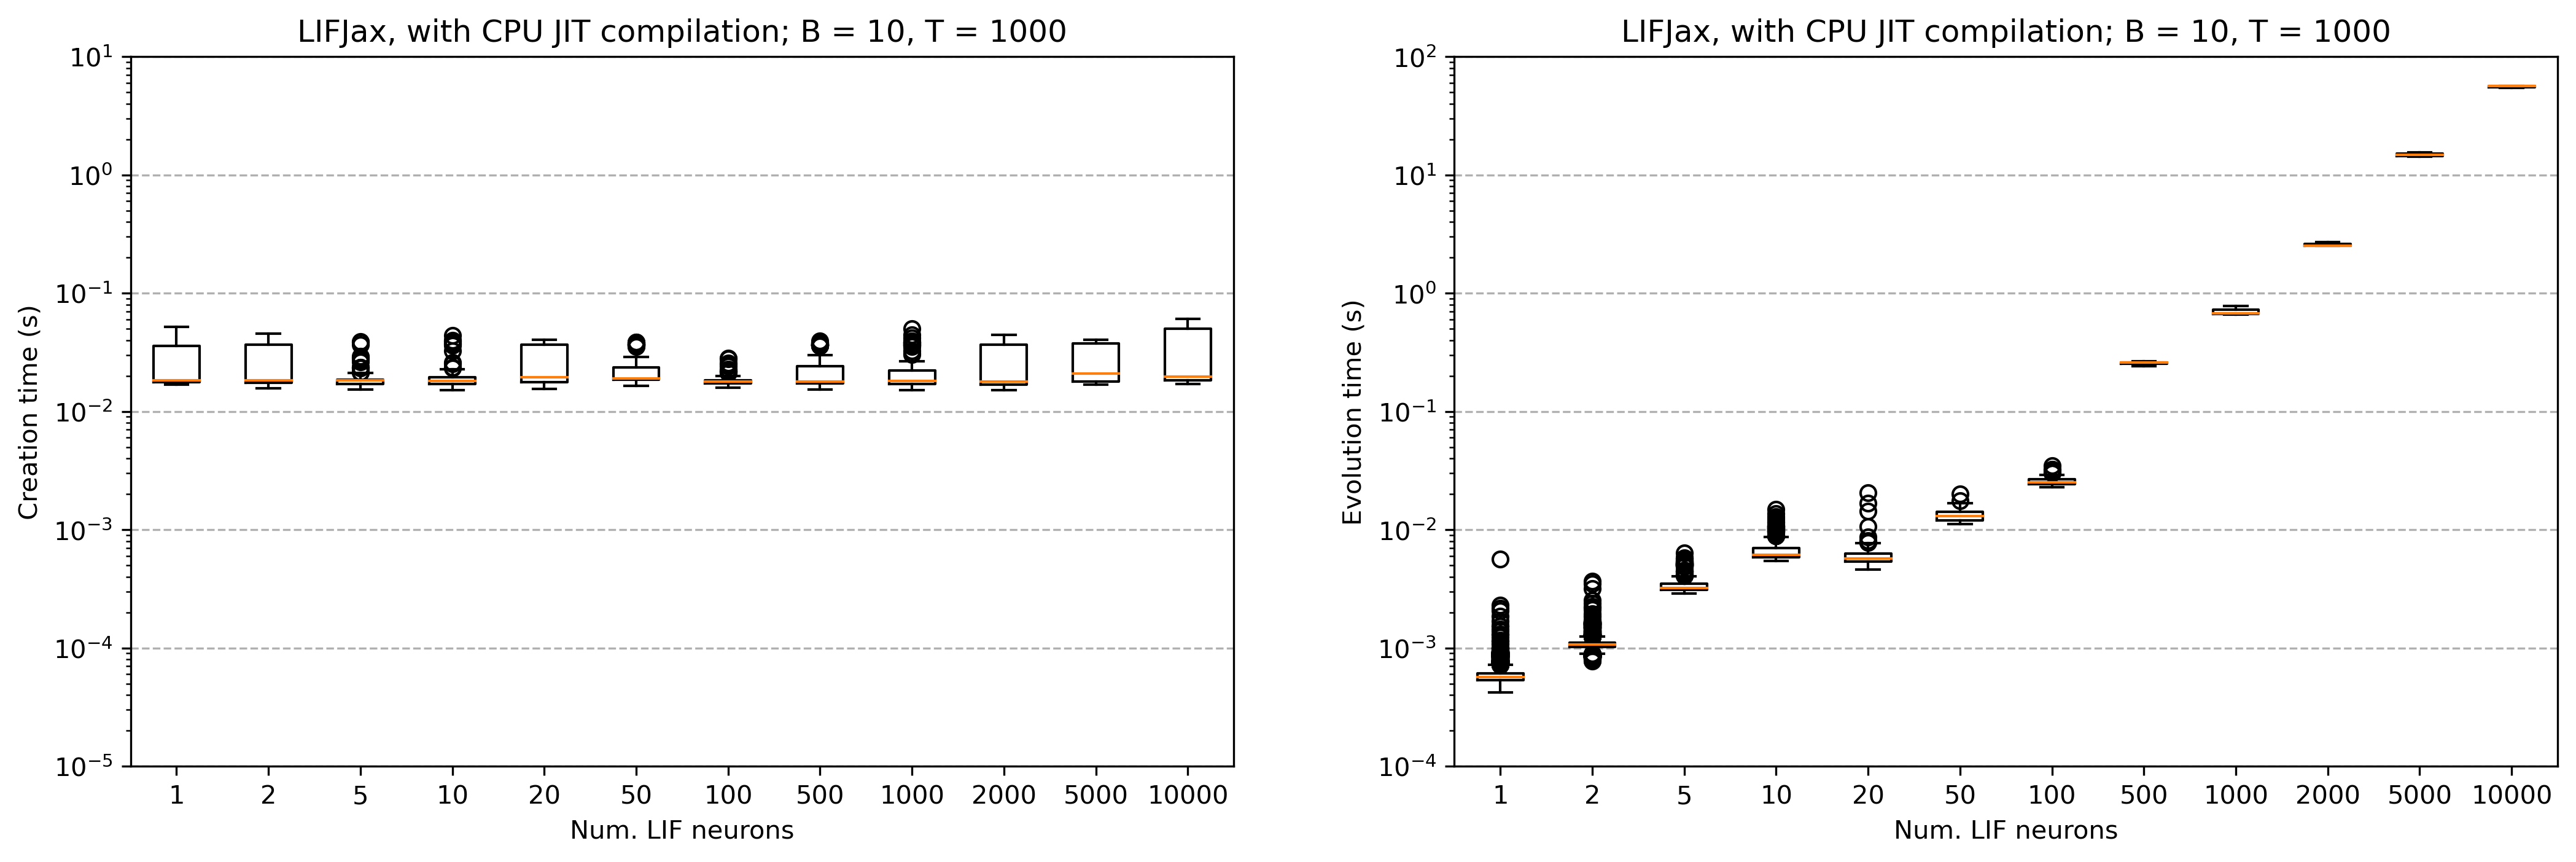

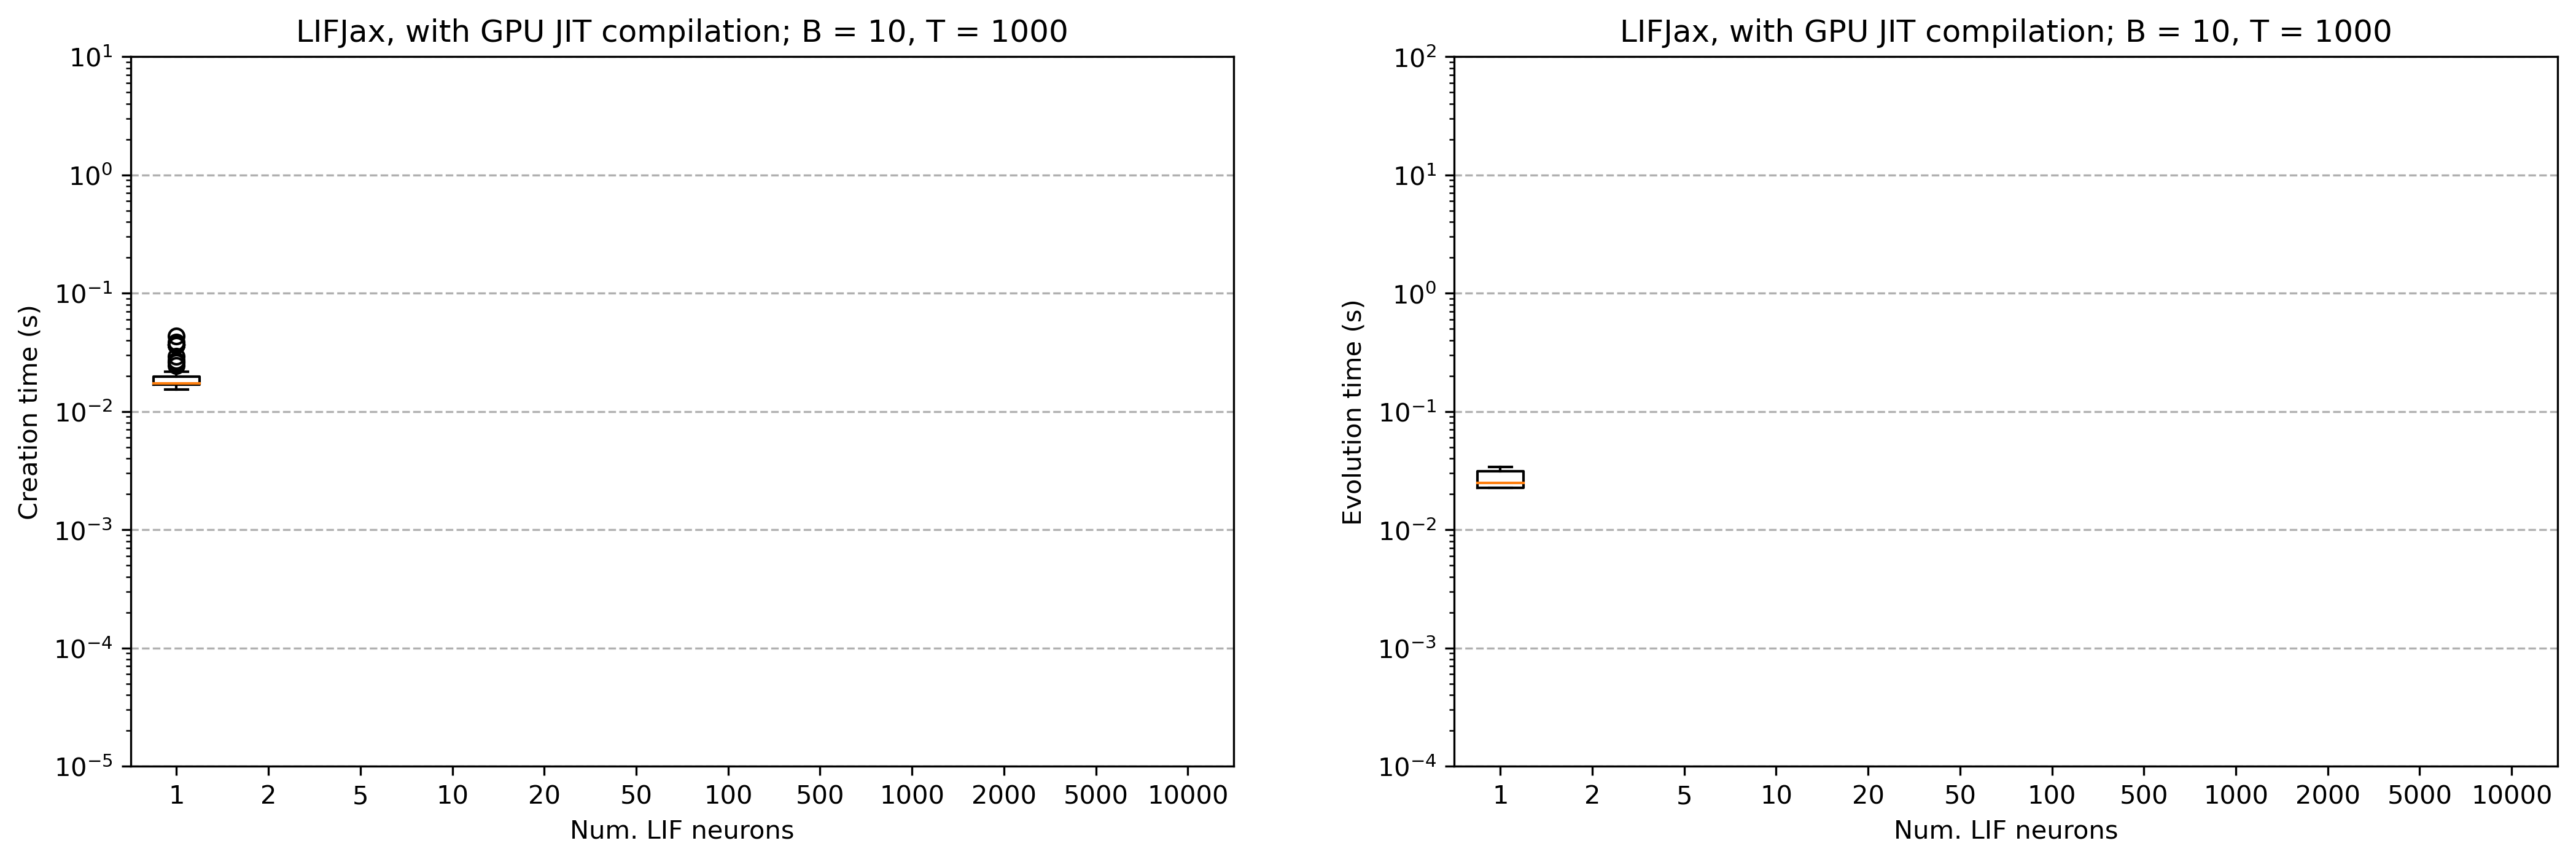

In [3]:
# - Display benchmark results that succeeded
for results in bench_results:
    if not all([len(r) == 0 for r in results[0]]):
        _, axes = plt.subplots(1, 2)
        plot_benchmark_results(*results, axes)